In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import sys
sys.path.append(r"C:\Users\Daniel\Desktop\Projects\project-pandas\src")
from cleaning import*

In [2]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('output/analized_data.csv')

In [4]:
df = df.set_index('Unnamed: 0')
df.index.name = None

<AxesSubplot:ylabel='Sex'>

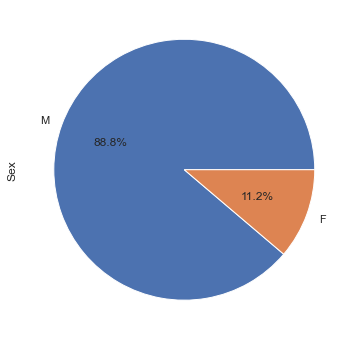

In [5]:
data = df["Sex"].value_counts()
data.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='Leg Injured'>

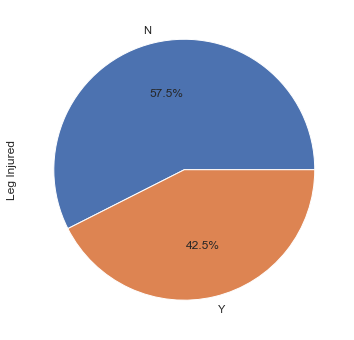

In [6]:
data = df["Leg Injured"].value_counts()
data.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='Leg Injured'>

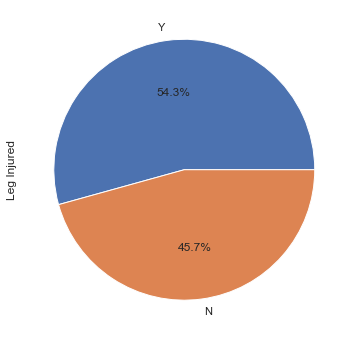

In [7]:
data = df[(df["Activity"] == "Surfing")]["Leg Injured"].value_counts()
data.plot.pie(autopct="%.1f%%")

<AxesSubplot:xlabel='Leg Injured', ylabel='count'>

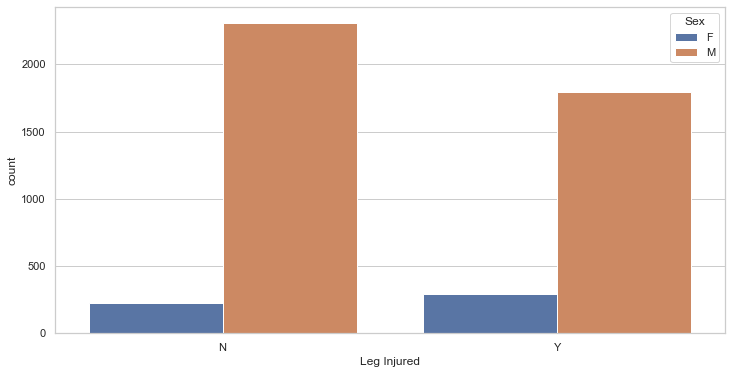

In [8]:
sns.countplot(x=df["Leg Injured"], hue=df["Sex"])

<AxesSubplot:xlabel='Leg Injured', ylabel='count'>

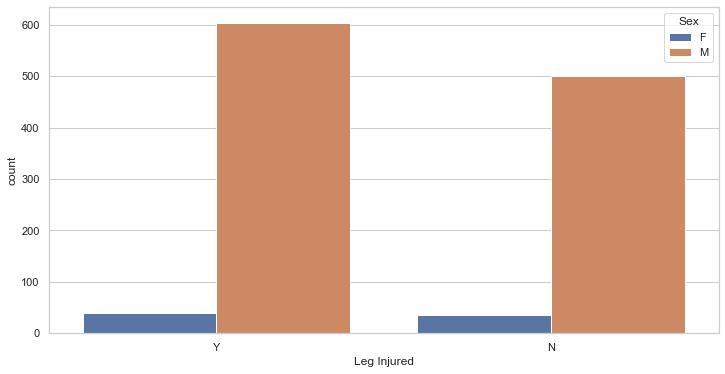

In [9]:
sns.countplot(x=df[(df["Activity"] == "Surfing")]["Leg Injured"], hue=df["Sex"])

In [10]:
df

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Leg Injured
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,N
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Y
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Y
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,Y
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,ND.0013,No date (3 days after preceding incident) & pr...,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,N
6290,ND.0012,Before 19-Jul-1913,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,"FATAL, leg stripped of flesh",Y,Y
6291,ND.0011,Before 1911,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,NaN,Foot severed,N,Y
6293,ND.0009,Before 1906,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,N


In [11]:
df["Age"] = df["Age"].apply(age2)

In [12]:
df = df[df['Age'].notna()]

In [13]:
df = df.astype({"Age": int})

In [14]:
df["Age"].unique()

array([57, 11, 48, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54, 41, 37,
       56, 19, 25, 69, 18, 38, 55, 35, 46, 45, 14, 40, 28, 20, 24, 26,  7,
       31, 17, 13, 42,  3,  8, 50, 16, 82, 73, 68, 51, 39, 58, 22, 47, 61,
       65, 36, 66, 43,  9, 49, 72, 59,  6, 27, 64, 23, 71, 44, 62, 63, 70,
       53, 77,  5, 86, 75, 87, 67,  1, 81])

<AxesSubplot:xlabel='Age', ylabel='Count'>

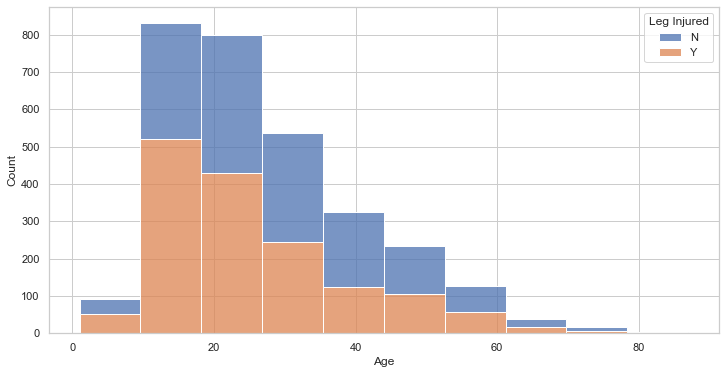

In [15]:
sns.histplot(data=df, x="Age", hue="Leg Injured", multiple="stack", bins=10)

<AxesSubplot:xlabel='Age', ylabel='Count'>

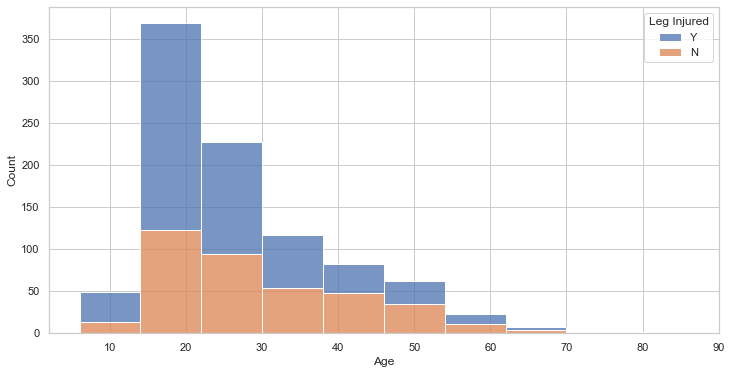

In [16]:
sns.histplot(data=df[df["Activity"]=="Surfing"], x="Age", hue="Leg Injured", multiple="stack", bins=10)